### 1. Implement a function that computes a QR factorization of a given n x n matrix.

In [376]:
import numpy as np
def givens_rotation(A):
    #QR decomposition of matrix A via Givens rotation
    n = A.shape[0]
    #initialization
    Q = np.identity(n)
    R = A
    # Get indexs we need to visit
    (rows, cols) = np.tril_indices(n, -1)
    for (row, col) in zip(rows, cols):
        # zero-out lower triangular matrix entries.
        if R[row, col] != 0:
            c = R[col, col]/np.sqrt(R[col, col]**2+R[row, col]**2)
            s = -R[row, col]/np.sqrt(R[col, col]**2+R[row, col]**2)        
            G = np.identity(n)
            G[[col, row], [col, row]] = c
            G[row, col] = -s
            G[col, row] = s
            R = np.dot(G.T, R)
            Q = np.dot(Q, G)
    return unique(Q, R)

def unique(Q, R):
    n = Q.shape[0]
    for i in range(n):
        if R[i, i] < 0:
            R[i, i] = -R[i, i]
            Q[:,i] = -Q[:,i]
    return (Q, R)

def test(n, number):
    for i in range(number):
        A = np.random.normal(size=(n,n))
        (Q, R) = givens_rotation(A)
        print("QQT should be I now is {} \n R should triangular and R now is {} \n QR should be A {} \n now is {}\n".
              format(np.dot(Q, Q.T), R, A, np.dot(Q,R)))

In [377]:
test(5, 1)

QQT should be I now is [[ 1.00000000e+00 -4.77876193e-18 -1.27710371e-16  6.15916791e-17
   1.19589292e-17]
 [-4.77876193e-18  1.00000000e+00  1.37169890e-16  1.24811977e-16
  -3.76270350e-17]
 [-1.27710371e-16  1.37169890e-16  1.00000000e+00  4.68399866e-17
   3.18445114e-17]
 [ 6.15916791e-17  1.24811977e-16  4.68399866e-17  1.00000000e+00
   5.40744089e-17]
 [ 1.19589292e-17 -3.76270350e-17  3.18445114e-17  5.40744089e-17
   1.00000000e+00]] 
 R should triangular and R now is [[ 2.21734452e+00 -4.68609359e-01 -6.80059792e-01  1.87366563e+00
   6.32482465e-01]
 [-3.48594589e-17  1.68542256e+00 -1.15850336e+00 -1.12330307e+00
   1.05633198e+00]
 [ 3.97838036e-17  5.26248352e-17  3.12651236e+00  1.08009438e+00
  -4.96140190e-01]
 [ 1.87643094e-17  5.44816868e-17  1.85683099e-16  6.30847258e-01
   3.09627248e-01]
 [ 2.25765754e-17  2.65214774e-17 -5.20175489e-17  2.96509738e-18
   9.18460068e-01]] 
 QR should be A [[-1.61968457  0.57262702  1.9026182  -0.77566411 -0.18808974]
 [-1.03574

### 2.Write a function that generates random orthogonal matrices.

In [378]:
def generate_Q(n, seed=0):
    np.random.seed(seed)
    A = np.random.normal(size=(n,n))
    (Q, R) = givens_rotation(A)
    return Q

In [379]:
generate_Q(3)

array([[ 0.58684003, -0.48538278,  0.6480913 ],
       [ 0.74546871,  0.63631164, -0.19845377],
       [ 0.316062  , -0.5995924 , -0.73525082]])

### 3.By modifying your QR factorization code, implement a function that reduces a given nxn matrix into a Hessenberg form by orthogonal transformations.

In [380]:
from math import copysign
def householder_hessenberg(A, force_zero=False):
    """reduce A to hessenberg form."""
    n = A.shape[0]
    Q = np.identity(n)
    H = np.copy(A)
    
    for row in range(n - 2):
        x = H[row+1:, row]
        e = np.zeros_like(x)
        e[0] = copysign(np.linalg.norm(x), -A[row+1, row])
        u = x + e
        v = u / np.linalg.norm(u)

        P = np.identity(n)
        P[row+1:, row+1:] -= 2.0 * np.outer(v, v)

        H = np.dot(P, H)
        H = np.dot(H, P.T)
        Q = np.dot(Q, P.T)
    
    for row in range(2, n):
        for col in range(row-1):
            H[row, col] = 0
            H[col, row] = 0
    
    return (Q, H)

#### given a nxn matrix A，reduce it to Hessenberg form.

In [381]:
A = np.random.normal(size=(4,4))
(Q, H) = householder_hessenberg(A, True)
print("Q is \n{}\n H is \n{}\n QHQT is \n{}\n and A is \n{}\n".format(Q, H, np.dot(np.dot(Q, H), Q.T), A))

Q is 
[[ 1.          0.          0.          0.        ]
 [ 0.          0.17487531  0.54775692  0.81815706]
 [ 0.         -0.29486016 -0.76368862  0.57431453]
 [ 0.          0.939402   -0.34167535  0.02796141]]
 H is 
[[ 0.4105985   0.31130271  0.          0.        ]
 [ 0.69578157  3.20915744 -0.34269182  0.        ]
 [ 0.          1.49988414 -1.67174142  0.44258203]
 [ 0.          0.          0.55423607  0.3221061 ]]
 QHQT is 
[[ 0.4105985   0.05443916 -0.09179077  0.29243838]
 [ 0.12167502  0.36973848  0.28164162  1.49154578]
 [-0.20515826  0.43805068 -0.76636254 -2.54871839]
 [ 0.6536186   0.46624996 -1.02167632  2.25614617]]
 and A is 
[[ 0.4105985   0.14404357  1.45427351  0.76103773]
 [ 0.12167502  0.44386323  0.33367433  1.49407907]
 [-0.20515826  0.3130677  -0.85409574 -2.55298982]
 [ 0.6536186   0.8644362  -0.74216502  2.26975462]]



#### given a nxn real symmetric matrix A，reduce it to the tridiagonal form.

In [382]:
A= np.array([[1, 2, 3], [2, 1, 3], [3, 3, 1]])
(Q, H) = householder_hessenberg(A*1.0)
print("Q is \n{}\n H is \n{}\n QHQT is \n{}\n and A is \n{}\n".format(Q, H, np.dot(np.dot(Q, H), Q.T), A))

Q is 
[[ 1.          0.          0.        ]
 [ 0.          0.5547002   0.83205029]
 [ 0.          0.83205029 -0.5547002 ]]
 H is 
[[ 1.          3.60555128  0.        ]
 [ 3.60555128  3.76923077  1.15384615]
 [ 0.          1.15384615 -1.76923077]]
 QHQT is 
[[1. 2. 3.]
 [2. 1. 3.]
 [3. 3. 1.]]
 and A is 
[[1 2 3]
 [2 1 3]
 [3 3 1]]



In [383]:
A= np.array([[1, 2, 3], [2, 1, 3], [3, 3, 1]])
(Q, H) = householder_hessenberg(A*1.0, True)
print("Q is \n{}\n H is \n{}\n QHQT is \n{}\n and A is \n{}\n".format(Q, H, np.dot(np.dot(Q, H), Q.T), A))

Q is 
[[ 1.          0.          0.        ]
 [ 0.          0.5547002   0.83205029]
 [ 0.          0.83205029 -0.5547002 ]]
 H is 
[[ 1.          3.60555128  0.        ]
 [ 3.60555128  3.76923077  1.15384615]
 [ 0.          1.15384615 -1.76923077]]
 QHQT is 
[[1. 2. 3.]
 [2. 1. 3.]
 [3. 3. 1.]]
 and A is 
[[1 2 3]
 [2 1 3]
 [3 3 1]]



### 4.Write a code that performs the QR algorithm on a given real symmetric tridiagonal matrix.

In [384]:
eps = np.finfo(np.float64).eps

def unique(Q, R):
    n = Q.shape[0]
    for i in range(n):
        if R[i, i] < 0:
            R[i, i] = -R[i, i]
            Q[:,i] = -Q[:,i]
    return (Q, R)

def next_value(T):
    values = []
    n = T.shape[0]
    for index in range(n):
        if index == (n-1):
            value = np.abs(T[n-1,n-2])
        elif index == 0:
            value = np.abs(T[1,0])
        else:
            value =np.abs(T[index-1, index])
        values.append(value)
    return values    
        
def basic_qr(A, n_max=200):
    n = A.shape[0]
    dia_history = np.zeros((n_max, n))
    next_history = np.zeros((n_max, n))
    T = A
    for i in range(n_max):
        (Q, R) = givens_rotation(T)
        T = np.dot(R, Q)
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        dia_history[i] = T.diagonal()
        next_history[i] = next_value(T)
    return T, dia_history, next_history

def rqs_qr(A, n_max=200):
    n = A.shape[0]
    dia_history = np.zeros((n_max, n))
    next_history = np.zeros((n_max, n))
    T = A
    for i in range(n_max):
        u = T[n-1, n-1]
        (Q, R) = givens_rotation(T-u*np.eye(n))
        T = np.dot(R, Q)+u*np.eye(n)        
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        dia_history[i] = T.diagonal()
        next_history[i] = next_value(T)
    return T, dia_history, next_history

def wilkinson_u(a, b, c):
    d = (a-c)/2
    u = c - np.sign(d)*b**2/(np.abs(d)+np.sqrt(d**2+b**2))
    return u
    
def wilkinson_qr(A, n_max=200):
    n = A.shape[0]
    dia_history = np.zeros((n_max, n))
    next_history = np.zeros((n_max, n))
    T = A
    for i in range(n_max):
        u = wilkinson_u(T[n-2, n-2], T[n-2, n-1], T[n-1, n-1])
        (Q, R) = givens_rotation(T-u*np.eye(n))
        T = np.dot(R, Q)+u*np.eye(n)
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        dia_history[i] = T.diagonal()
        next_history[i] = next_value(T)
    return T, dia_history, next_history

A = np.array([[1,2.5,0,0],[2.5,1.5,3.9,0],[0,3.9,1.9,4],[0,0,4,0.1]])
A = A*1.0
print(basic_qr(A)[0])
print(rqs_qr(A)[0])
print(wilkinson_qr(A)[0])
print('true is {}'.format(np.linalg.eig(A*1.0)[0]))

[[ 7.29311819e+00  2.20447471e-16  0.00000000e+00  0.00000000e+00]
 [ 5.07977281e-40 -4.58217628e+00  8.07792733e-16  0.00000000e+00]
 [ 0.00000000e+00  4.15155553e-48  2.62711717e+00 -1.78556017e-16]
 [ 0.00000000e+00  0.00000000e+00  1.73428160e-99 -8.38059083e-01]]
[[ 7.29311819e+000  3.95880856e-017  0.00000000e+000  0.00000000e+000]
 [ 8.04613169e-067 -4.58217628e+000  8.25407777e-007  0.00000000e+000]
 [ 0.00000000e+000  8.25407776e-007  2.62711717e+000 -2.08455628e-018]
 [ 0.00000000e+000  0.00000000e+000 -4.94065646e-324 -8.38059083e-001]]
[[ 7.29311819e+00  4.43186989e-16  0.00000000e+00  0.00000000e+00]
 [ 5.64859099e-43  2.62711717e+00 -2.09557478e-16  0.00000000e+00]
 [ 0.00000000e+00  5.20156428e-57 -8.38059083e-01 -4.29446762e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.58217628e+00]]
true is [ 7.29311819  2.62711717 -0.83805908 -4.58217628]


### 5. Generate a symmetric random matrix with a given set of eigenvalues

In [385]:
import matplotlib.pyplot as plt

def generate_A(seed=0, n=10,eigen_type='normal'):
    eigenvalues=np.arange(1,n+1)
    if eigen_type=='small':
        eigenvalues[0] = 0.0001
    elif eigen_type=='big':
        eigenvalues[n-1]=10000
    elif eigen_type=='mutiple':
        eigenvalues[1:3] = 2
    elif eigen_type=='cluster':
        eigenvalues[1] = 2.1
        eigenvalues[2] = 1.9
    elif eigen_type == 'singular':
        eigenvalues[0] = 0
    elif eigen_type == 'negative':
        eigenvalues[0] = -1  
    dia = np.diag(eigenvalues)
    Q = generate_Q(n, seed=seed)
    A = np.dot(np.dot(Q.T, dia), Q)
    return A

def get_eigen(qr_method='basic_qr', seed=0, eigen_type='normal'):
    A = generate_A(seed=seed, eigen_type=eigen_type)
    (Q, H) = householder_hessenberg(A, True)
    if qr_method == 'basic_qr':
        T, dia_history, next_history = basic_qr(H)
    elif qr_method == 'rqs_qr':
        T, dia_history, next_history = rqs_qr(H)
    elif qr_method == 'wilkinson_qr':
        T, dia_history, next_history = wilkinson_qr(H)
    return T, dia_history, next_history


def plot_info(qr_method='basic_qr', eigen_type='normal', seed=0, min_eigen_val=1, max_eigen_val=10):
    T, dia_history, next_history = get_eigen(qr_method=qr_method, seed=seed, eigen_type='normal')
    L = dia_history.shape[0]
    min_index = np.argmin(dia_history[L-1,:])
    max_index = np.argmax(dia_history[L-1,:])
    
    min_eigen = dia_history[:,min_index]
    next_min = next_history[:,min_index]
    max_eigen = dia_history[:,max_index]
    next_max = next_history[:,max_index]
        
    plot_min_eigen = np.log(np.abs(min_eigen-min_eigen_val))
    plot_next_min = np.log(next_min)
    plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))
    plot_next_max = np.log(next_max)
    
    return plot_min_eigen, plot_next_min, plot_max_eigen, plot_next_max

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


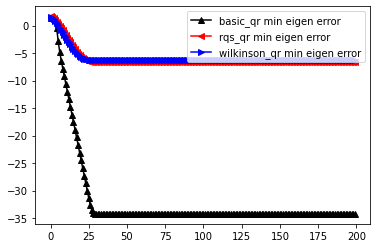

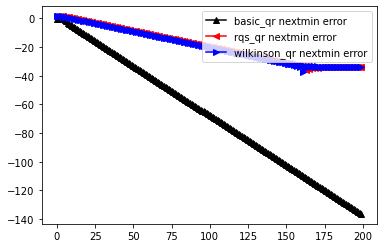

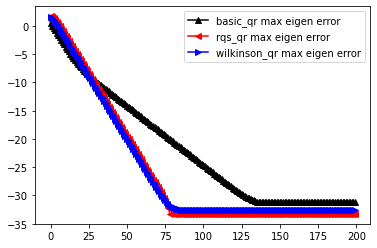

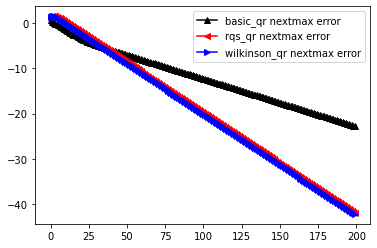

In [386]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1)
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1)
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1)

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

#### From these pictures,we can see that wilkinson QR is faster than rqs QR and in finding large eigenvalues they are faster than basic qr. 

### 6.Repeat the previous exercise to experiment with interesting situations such as negative eigenvalues, multiple eigenvalues, clustered eigenvalues, singular matrices, extremely small eigenvalues, extremely large eigenvalues, etc.

#### 6.1 negative values

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


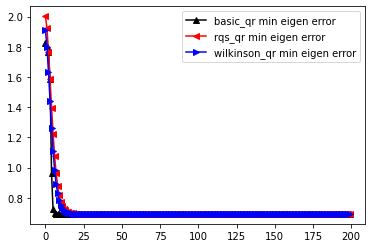

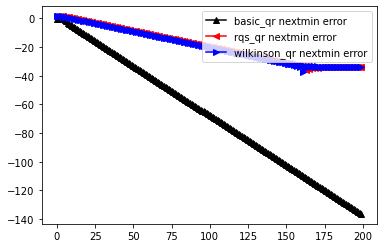

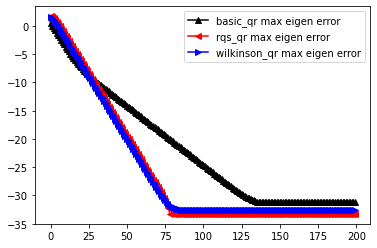

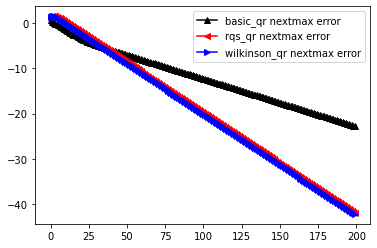

In [387]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, min_eigen_val=-1, eigen_type='negative')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  min_eigen_val=-1,eigen_type='negative')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  min_eigen_val=-1,eigen_type='negative')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

#### mutiple eigenvalues

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


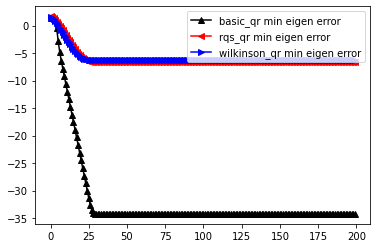

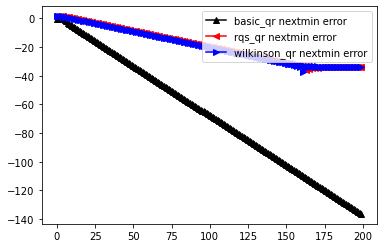

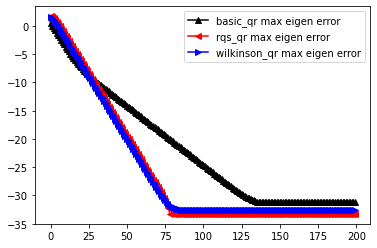

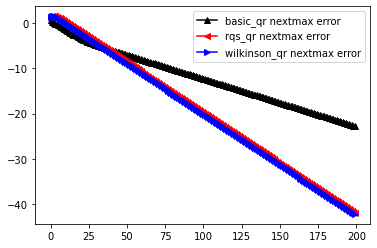

In [388]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, min_eigen_val=1, eigen_type='multiple')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  min_eigen_val=1,eigen_type='multiple')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  min_eigen_val=1,eigen_type='multiple')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

#### clustered eigenvalues

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


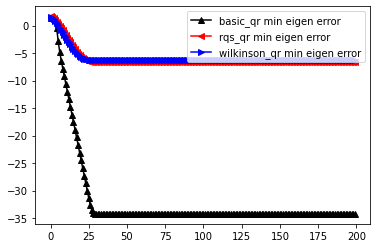

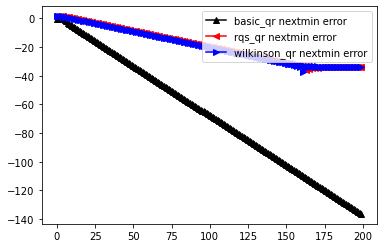

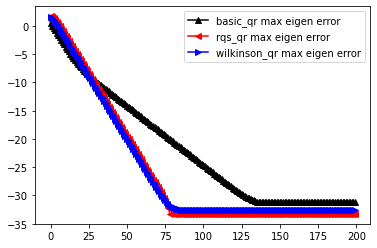

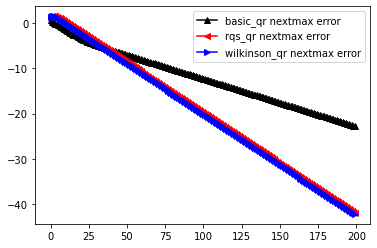

In [389]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, min_eigen_val=1, eigen_type='cluster')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  min_eigen_val=1,eigen_type='cluster')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  min_eigen_val=1,eigen_type='cluster')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

#### singular matrices

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


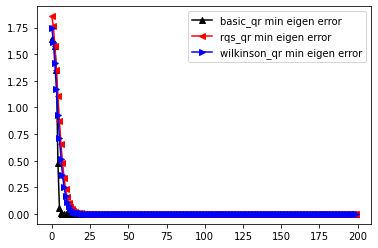

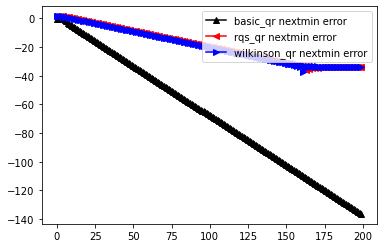

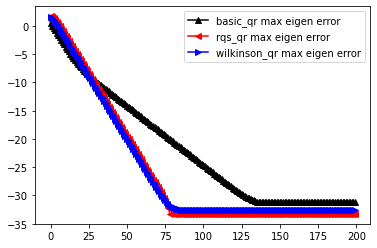

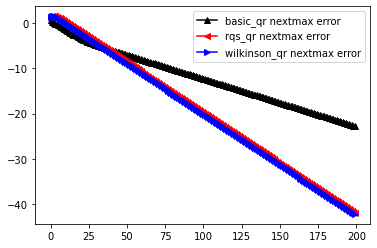

In [390]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, min_eigen_val=0, eigen_type='singular')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  min_eigen_val=0,eigen_type='singular')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  min_eigen_val=0,eigen_type='singular')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

#### extremely small eigenvalues

<ipython-input-385-ee922a2b4677>:48: RuntimeWarning: divide by zero encountered in log
  plot_max_eigen = np.log(np.abs(max_eigen-max_eigen_val))


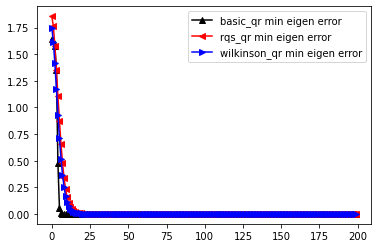

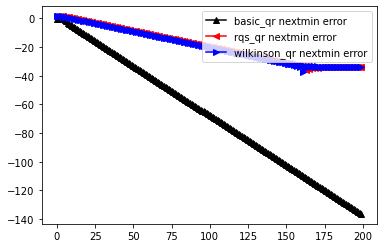

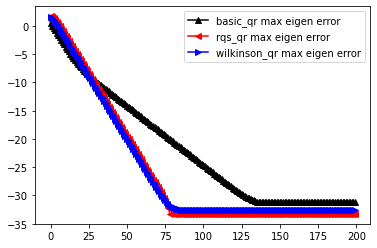

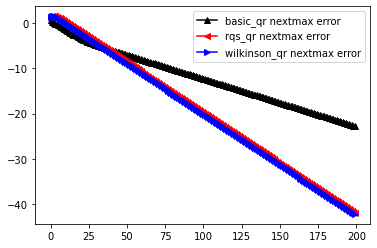

In [391]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, min_eigen_val=0.0001, eigen_type='small')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  min_eigen_val=0.0001,eigen_type='small')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  min_eigen_val=0.0001,eigen_type='small')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

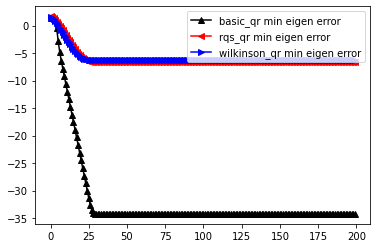

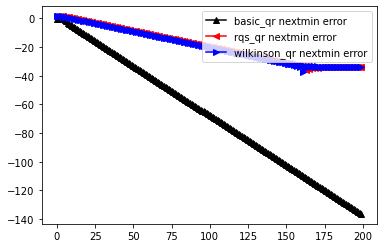

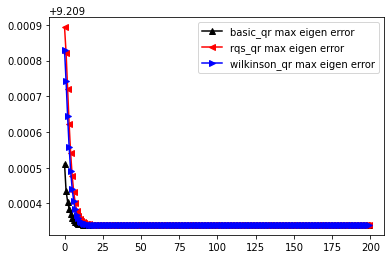

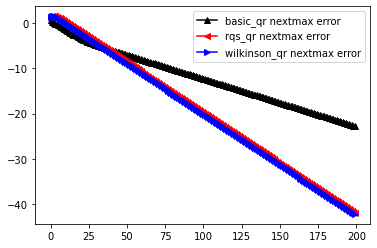

In [392]:
plot_min_eigen1, plot_next_min1, plot_max_eigen1, plot_next_max1 = plot_info(qr_method='basic_qr', seed=1, max_eigen_val=10000, eigen_type='big')
plot_min_eigen2, plot_next_min2, plot_max_eigen2, plot_next_max2 = plot_info(qr_method='rqs_qr', seed=1,  max_eigen_val=10000,eigen_type='big')
plot_min_eigen3, plot_next_min3, plot_max_eigen3, plot_next_max3 = plot_info(qr_method='wilkinson_qr', seed=1,  max_eigen_val=10000,eigen_type='big')

index = np.arange(len(plot_min_eigen1))
plt.plot(index, plot_min_eigen1, color='black', marker='^')
plt.plot(index, plot_min_eigen2, color='red', marker='<')
plt.plot(index, plot_min_eigen3, color='blue', marker='>')
plt.legend(['basic_qr min eigen error', 'rqs_qr min eigen error', 'wilkinson_qr min eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_min1, color='black', marker='^')
plt.plot(index, plot_next_min2, color='red', marker='<')
plt.plot(index, plot_next_min3, color='blue', marker='>')
plt.legend(['basic_qr nextmin error', 'rqs_qr nextmin error', 'wilkinson_qr nextmin error'], loc='upper right')
plt.show()

plt.plot(index, plot_max_eigen1, color='black', marker='^')
plt.plot(index, plot_max_eigen2, color='red', marker='<')
plt.plot(index, plot_max_eigen3, color='blue', marker='>')
plt.legend(['basic_qr max eigen error', 'rqs_qr max eigen error', 'wilkinson_qr max eigen error'], loc='upper right')
plt.show()

plt.plot(index, plot_next_max1, color='black', marker='^')
plt.plot(index, plot_next_max2, color='red', marker='<')
plt.plot(index, plot_next_max3, color='blue', marker='>')
plt.legend(['basic_qr nextmax error', 'rqs_qr nextmax error', 'wilkinson_qr nextmax error'], loc='upper right')
plt.show()

### 7.matrix once the last off-diagonal entry is small enough

In [393]:
import matplotlib.pyplot as plt

def next_value(T):
    values = []
    n = T.shape[0]
    for index in range(n):
        if index == (n-1):
            value = np.abs(T[n-1,n-2])
        elif index == 0:
            value = np.abs(T[1,0])
        else:
            value =np.abs(T[index-1, index])
        values.append(value)
    return values

def unique(Q, R):
    n = Q.shape[0]
    for i in range(n):
        if R[i, i] < 0:
            R[i, i] = -R[i, i]
            Q[:,i] = -Q[:,i]
    return (Q, R)
    
def basic_qr(A, n_max=20000):
    n = A.shape[0]
    T = A
    eigen_value = []
    right_low = []
    sub_right_low = []
    interval = [-1]
    for i in range(n_max):
        
        right_low.append(T[n-1, n-1])
        sub_right_low.append(T[n-1, n-2])
        if n==2:
            a1 = T[0,0]
            a2 = T[1,1]
            b = T[0,1]
            gamma1 = (a1+a2)/2+np.sqrt(((a1-a2)/2)**2+b**2)
            gamma2 = (a1+a2)/2-np.sqrt(((a1-a2)/2)**2+b**2)
            eigen_value.append(gamma1)
            eigen_value.append(gamma2)
            break
            
        (Q, R) = givens_rotation(T)
        T = np.dot(R, Q)
        
        
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        if np.abs(T[n-1, n-2])< 1e-11:
            interval.append(i)
            eigen_value.append(T[n-1, n-1])
            T = T[0:n-1, 0:n-1]
            n = n-1
    return eigen_value, right_low, sub_right_low, interval
    

def rqs_qr(A, n_max=20000):
    n = A.shape[0]
    T = A
    eigen_value = []
    right_low = []
    sub_right_low = []
    interval = [-1]
    for i in range(n_max):
        right_low.append(T[n-1, n-1])
        sub_right_low.append(T[n-1, n-2])
        if n==2:
            a1 = T[0,0]
            a2 = T[1,1]
            b = T[0,1]
            gamma1 = (a1+a2)/2+np.sqrt(((a1-a2)/2)**2+b**2)
            gamma2 = (a1+a2)/2-np.sqrt(((a1-a2)/2)**2+b**2)
            eigen_value.append(gamma1)
            eigen_value.append(gamma2)
            break
            
        u = T[n-1, n-1]
        
        (Q, R) = givens_rotation(T-u*np.eye(n))
        T = np.dot(R, Q)+u*np.eye(n)        
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        if np.abs(T[n-1, n-2])< 1e-11:
            interval.append(i)
            eigen_value.append(T[n-1, n-1])
            T = T[0:n-1, 0:n-1]
            n = n-1
    return eigen_value, right_low, sub_right_low, interval

def wilkinson_u(a, b, c):
    d = (a-c)/2
    u = c - np.sign(d)*b**2/(np.abs(d)+np.sqrt(d**2+b**2))
    return u
    
def wilkinson_qr(A, n_max=20000):
    n = A.shape[0]
    T = A
    eigen_value = []
    right_low = []
    sub_right_low = []
    interval = [-1]
    for i in range(n_max):
        right_low.append(T[n-1, n-1])
        sub_right_low.append(T[n-1, n-2])
        if n==2:
            a1 = T[0,0]
            a2 = T[1,1]
            b = T[0,1]
            gamma1 = (a1+a2)/2+np.sqrt(((a1-a2)/2)**2+b**2)
            gamma2 = (a1+a2)/2-np.sqrt(((a1-a2)/2)**2+b**2)
            eigen_value.append(gamma1)
            eigen_value.append(gamma2)
            break
            
        u = wilkinson_u(T[n-2, n-2], T[n-2, n-1], T[n-1, n-1])
        (Q, R) = givens_rotation(T-u*np.eye(n))
        T = np.dot(R, Q)+u*np.eye(n)
        
        for row in range(2, n):
            for col in range(row-1):
                T[row, col] = 0
                T[col, row] = 0
        if np.abs(T[n-1, n-2])< 1e-11:
            interval.append(i)
            eigen_value.append(T[n-1, n-1])
            T = T[0:n-1, 0:n-1]
            n = n-1
    return eigen_value, right_low, sub_right_low, interval
    
#TEST
A = np.array([[1,2.5,0,0],[2.5,1.5,3.9,0],[0,3.9,1.9,4],[0,0,4,0.1]])
A = A*1.0
print(basic_qr(A)[0])
print(rqs_qr(A)[0])
print(wilkinson_qr(A)[0])
print('true is {}'.format(np.linalg.eig(A*1.0)[0]))

[-0.8380590832324458, 2.6271171722116256, 7.2931181879593785, -4.582176276938564]
[-0.8380590832324458, 2.627117172211621, 7.293118187959381, -4.58217627693856]
[-4.582176276938557, -0.8380590832324474, 7.2931181879593865, 2.627117172211623]
true is [ 7.29311819  2.62711717 -0.83805908 -4.58217628]


In [394]:
A = generate_A(seed=0, n=50)
(Q, H) = householder_hessenberg(A, True)
eigen_value1, right_low1, sub_right_low1, interval1 =  basic_qr(H)
eigen_value2, right_low2, sub_right_low2, interval2 =  rqs_qr(H)
eigen_value3, right_low3, sub_right_low3, interval3 =  wilkinson_qr(H)

In [395]:
sub_right_low1 = np.log(np.abs(np.array(sub_right_low1))+1e-10)
sub_right_low2 = np.log(np.abs(np.array(sub_right_low2))+1e-10)
sub_right_low3 = np.log(np.abs(np.array(sub_right_low3))+1e-10)
print("basic qr need {} steps to converge\n rqs qr need {} steps to converge\n wilkinson qr need {} steps to converge\n".format(len(right_low1), len(right_low2), len(right_low3)))

basic qr need 1529 steps to converge
 rqs qr need 162 steps to converge
 wilkinson qr need 106 steps to converge



This means wilkinson is faster than rqs and rqs is faster than basic qr in this case

In [396]:
def get_diff(interval, right_low, eigen_value):
    diff = np.zeros(len(right_low))
    for i in range(len(interval)-1):
        start = interval[i]
        end = interval[i+1]
        for j in range(start+1, end+1):
            diff[j] = np.log(np.abs(right_low[j]-eigen_value[i])+1e-10)
    return diff

diff1 = get_diff(interval1, right_low1, eigen_value1[0:48])
diff2 = get_diff(interval2, right_low2, eigen_value2[0:48])
diff3 = get_diff(interval3, right_low3, eigen_value3[0:48])

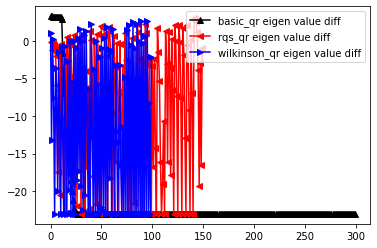

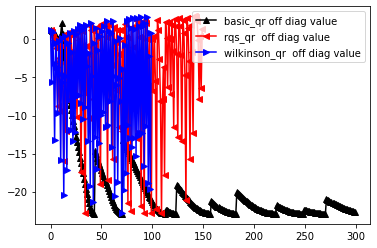

In [397]:
plt.plot(np.arange(len(right_low1))[0:300], diff1[0:300], color='black', marker='^')
plt.plot(np.arange(len(right_low2))[0:150], diff2[0:150], color='red', marker='<')
plt.plot(np.arange(len(right_low3))[0:100], diff3[0:100], color='blue', marker='>')
plt.legend(['basic_qr eigen value diff', 'rqs_qr eigen value diff', 'wilkinson_qr eigen value diff'], loc='upper right')
plt.show()

plt.plot(np.arange(len(sub_right_low1))[0:300], sub_right_low1[0:300], color='black', marker='^')
plt.plot(np.arange(len(sub_right_low2))[0:150], sub_right_low2[0:150], color='red', marker='<')
plt.plot(np.arange(len(sub_right_low3))[0:100], sub_right_low3[0:100], color='blue', marker='>')
plt.legend(['basic_qr off diag value', 'rqs_qr  off diag value', 'wilkinson_qr  off diag value'], loc='upper right')
plt.show()

#### In this picture, I draw all eigenvalues' change and it is obvious wilkinson is the best. I did not use use log-log scale since the original number is small. When I apply log to it, it becomes negative. I can not put another log in it. 